In [3]:
import essentia.standard as ess
import librosa as lib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LogNorm
from essentia import Pool

In [4]:
fs = 44100
audio = ess.MonoLoader(filename = '../audio/vignesh.wav', 
                                      sampleRate = fs)()
# dynamic range expansion as done in Matlab HTK implementation
audio = audio*2**15

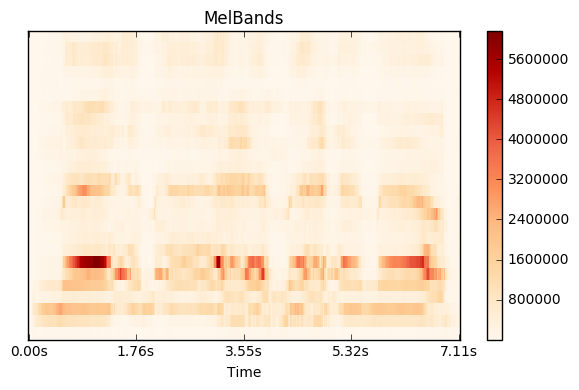

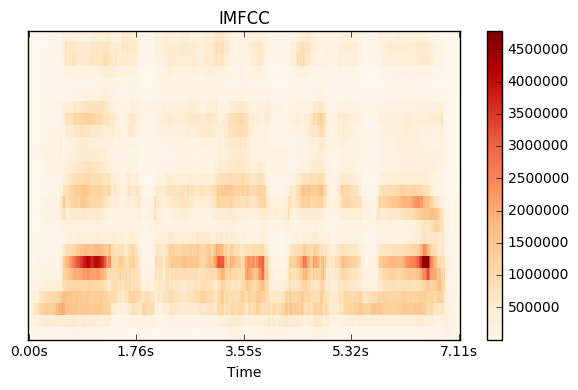

In [7]:
frameSize = 1102
hopSize = 441
fftSize = 2048
spectrumSize= fftSize//2+1
zeroPadding = fftSize - frameSize

w = ess.Windowing(type = 'hamming', 
                    size = frameSize, 
                    zeroPadding = zeroPadding,
                    normalized = False,
                    zeroPhase = False)

melsEssentia = ess.MelBands(inputSize = spectrumSize,
                    type = 'magnitude', 
                    warpingFormula = 'htkMel',
                    weighting = 'linear',
                    highFrequencyBound = 8000,
                    lowFrequencyBound = 0,
                    numberBands = 26,
                    normalize = 'unit_max',)

mfccEssentia = ess.MFCC(inputSize = spectrumSize,
                    type = 'magnitude', 
                    warpingFormula = 'htkMel',
                    weighting = 'linear',
                    highFrequencyBound = 8000,
                    lowFrequencyBound = 0,
                    numberBands = 26,
                    numberCoefficients = 13,
                    normalize = 'unit_max',
                    dctType = 3,
                    logType = 'log',
                    liftering = 22)

idct = ess.IDCT(inputSize=13, 
                outputSize=26, 
                dctType = 3, 
                liftering = 22)

spectrum = ess.Spectrum(size = fftSize)
pool = Pool()

for frame in ess.FrameGenerator(audio, frameSize = frameSize, hopSize = hopSize , startFromZero = True, validFrameThresholdRatio = 1):
    spect = spectrum(w(frame))
    pool.add('IMFCC',np.exp(idct(mfccEssentia(spect)[1])))
    pool.add('MelBands',melsEssentia(spect))


#Ploting essentia
lib.display.specshow(np.array(pool['MelBands'].T), x_axis='time')
plt.colorbar()
plt.title('MelBands')
plt.tight_layout()
plt.show()

#Ploting essentia
lib.display.specshow(np.array(pool['IMFCC'].T), x_axis='time')
plt.colorbar()
plt.title('IMFCC')
plt.tight_layout()
plt.show()